Taller Final Randon Forest Clasification 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score, ConfusionMatrixDisplay


In [2]:
# Load the data
data = pd.read_csv('creditcard_2023.csv')

# Remove the 'id' column
data = data.drop(columns=['id'])

# Remove duplicates
data = data.drop_duplicates()

# Standardize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the dataset into features and target variable
x_data = data.drop(columns=['Class'])  # Features (all columns except 'Class')
y_data = data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data) 

# Check the shape of the input and target data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(454903, 29) (113726, 29) (454903,) (113726,)


In [5]:
# Initialize a Random Forest classifier with default parameters.
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier with the training data.
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[56843    20]
 [    0 56863]]


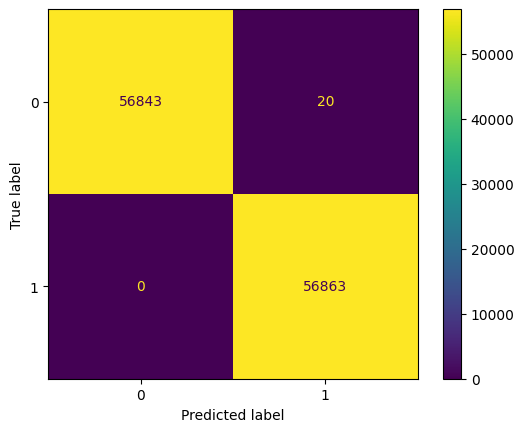


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Scores:
Accuracy: 0.9998241387193781
Precision: 0.9996484011040205
Recall: 1.0
F1 Score: 0.9998241696411302
ROC AUC: 0.9998241387193781


In [6]:
#Se predicen las classes usando el DF de test
y_pred = rf_classifier.predict(X_test)

#Se calculan las metricas de evalucacion 
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred)

# Print the performance metrics.
print("Confusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

print("\nClassification Report:")
print(class_report)

print("\nScores:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"ROC AUC: {roc_auc}")


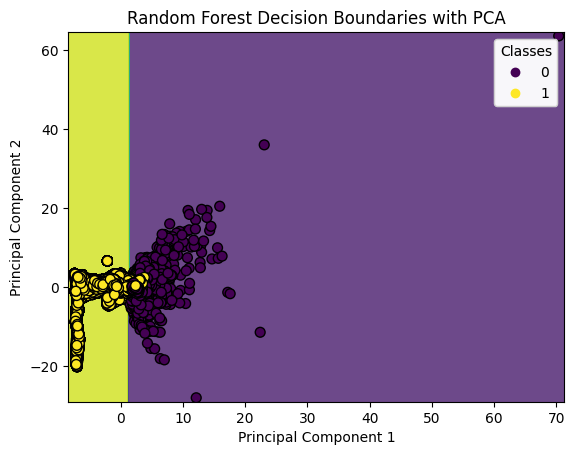

In [3]:
# Apply PCA and transform both training and test data to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train a new classifier
rf_classifier_pca = RandomForestClassifier(random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

# Create a grid of points to classify
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict classifications for each point in the grid
Z = rf_classifier_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=50, linewidth=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Random Forest Decision Boundaries with PCA')
# Create a legend based on the colors of the points
legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.gca().add_artist(legend1)
plt.show()

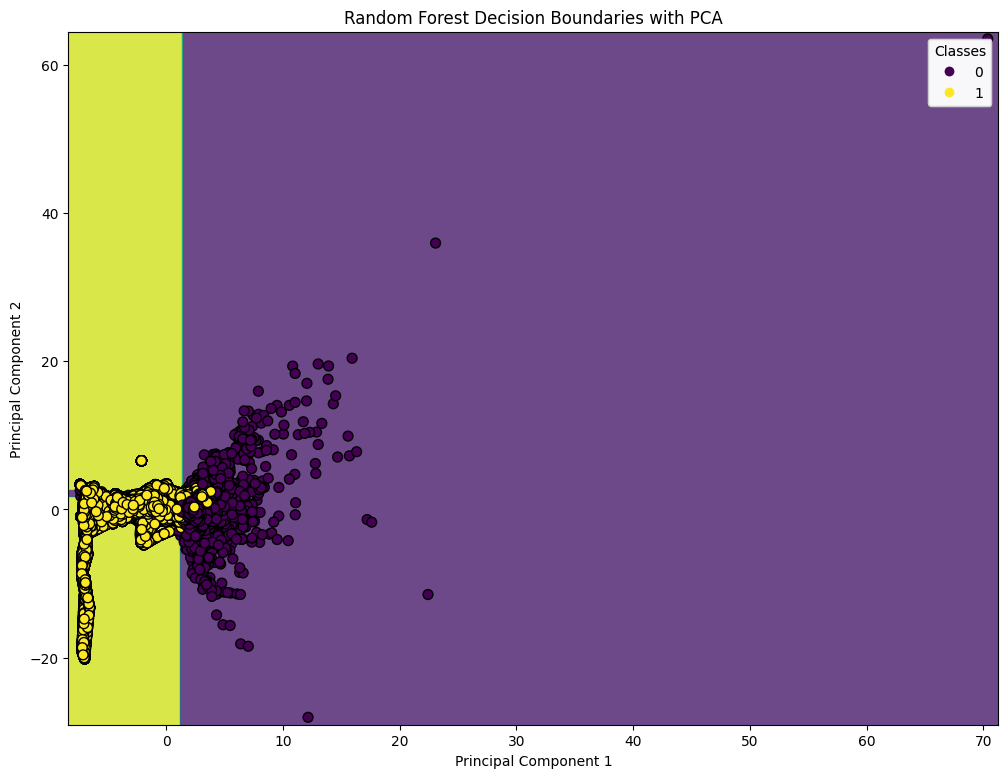

In [6]:
# Plot the figure
plt.figure(1, figsize=(12, 9))
# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=50, linewidth=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Random Forest Decision Boundaries with PCA')
# Create a legend based on the colors of the points
legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.gca().add_artist(legend1)
plt.show()

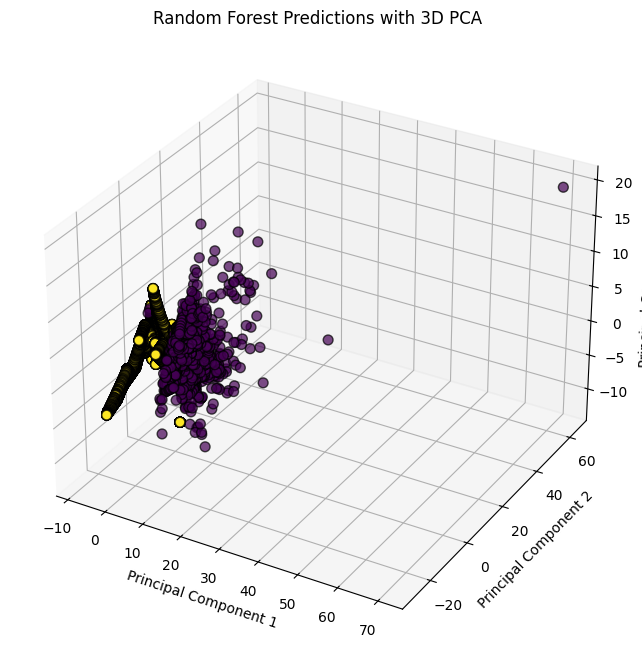

In [12]:
# Apply PCA and transform both training and test data to 3D
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train)
X_test_pca_3d = pca_3d.transform(X_test)

# Initialize and train a new classifier
rf_classifier_pca_3d = RandomForestClassifier(random_state=42)
rf_classifier_pca_3d.fit(X_train_pca_3d, y_train)

# Predict classes for the training data
y_pred_3d = rf_classifier_pca_3d.predict(X_train_pca_3d)

# Plot the data points in 3D space colored by predicted classification
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=y_pred_3d, edgecolors='k', marker='o', s=50, linewidth=1, alpha=0.7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Random Forest Predictions with 3D PCA')
plt.show()

2D PCA
Accuracy: 0.9430649103986776
Precision: 0.9662965019433648
Recall: 0.9181541599985931
F1 Score: 0.9416103811782528
ROC AUC: 0.9430649103986775

Confusion Matrix:
[[55042  1821]
 [ 4654 52209]]


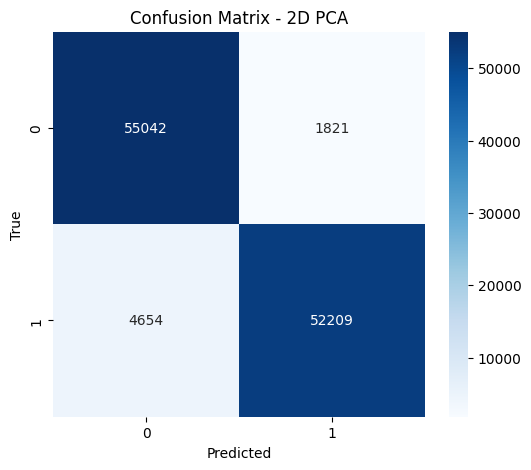

3D PCA
Accuracy: 0.9806816383236903
Precision: 0.9883858056677268
Recall: 0.9727942598878005
F1 Score: 0.9805280557303531
ROC AUC: 0.9806816383236904

Confusion Matrix:
[[56213   650]
 [ 1547 55316]]


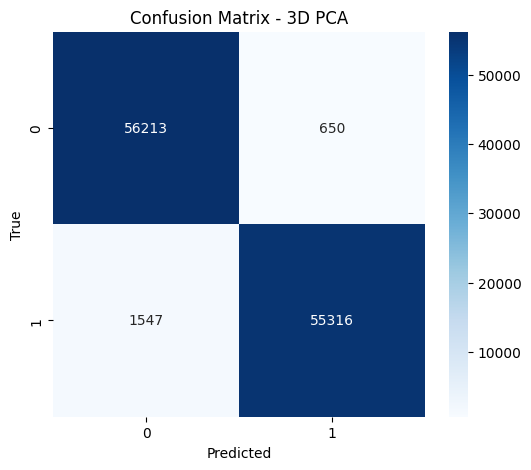

In [15]:
# Function to evaluate and print all the metrics
def evaluate_and_plot(y_true, y_pred, title):
    # Calculate metrics
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    roc_auc = roc_auc_score(y_true, y_pred)

    # Print metrics
    print(title)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("ROC AUC:", roc_auc)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - ' + title)
    plt.show()

# For 2D PCA
y_pred_2d = rf_classifier_pca.predict(X_test_pca)
evaluate_and_plot(y_test, y_pred_2d, "2D PCA")

# For 3D PCA
y_pred_3d = rf_classifier_pca_3d.predict(X_test_pca_3d)
evaluate_and_plot(y_test, y_pred_3d, "3D PCA")
